## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys


from sklearn.preprocessing import StandardScaler


## Be sure to used Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [3]:
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

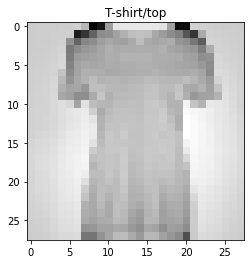

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(images[10].reshape(28, 28), cmap="binary")
#plt.title(targets_names[targets[10]])
plt.title(targets_names[targets[10]])
plt.show()

In [5]:
#print("First line of one image", images[11][0])
print("First line of one image", images[11])
print("Associated target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

# Create the model
![](images/simple_nn.png)

# Create the model

In [6]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.00451908 0.05019088 0.05747451 0.06479094 0.08665595 0.02762471
  0.45585573 0.02188745 0.00887576 0.22212492]] [9]


## Model Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [8]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Caterogical cross entropy

In [9]:
images_test = images[:5]
labels_test = targets[:5]

print(images_test.shape)
print(labels_test)

outputs_test = model.predict(images_test)

print(outputs_test.shape)
print("Output", outputs_test)

#print("\nLabels", labels_test)

filtered_outputs_test = outputs_test[np.arange(5), labels_test]
print("\nFiltered output", filtered_outputs_test)

log_filtered_output = np.log(filtered_outputs_test)
print("\nLog Filtered output", log_filtered_output)

print("Mean", log_filtered_output.mean())
print("Mean", -log_filtered_output.mean())

(5, 784)
[9 0 0 3 0]
(5, 10)
Output [[0.00451908 0.0501909  0.05747454 0.06479098 0.08665593 0.02762471
  0.45585585 0.02188745 0.00887576 0.22212496]
 [0.01521307 0.04820814 0.03243142 0.07685421 0.2739274  0.1805953
  0.0669179  0.03313248 0.03394466 0.23877543]
 [0.08168543 0.07827745 0.09847139 0.1001332  0.07262924 0.09054857
  0.17250632 0.02357215 0.1705243  0.11165193]
 [0.07222909 0.0213168  0.03103101 0.29847255 0.024772   0.03472528
  0.24367845 0.01558514 0.12710494 0.13108467]
 [0.04948055 0.04209538 0.01580912 0.03601937 0.4174117  0.25433362
  0.04201351 0.01191338 0.03344858 0.09747487]]

Filtered output [0.22212496 0.01521307 0.08168543 0.29847255 0.04948055]

Log Filtered output [-1.5045152 -4.1856003 -2.5048797 -1.2090772 -3.0061758]
Mean -2.4820495
Mean 2.4820495


## Train the model

In [11]:
history = model.fit(images, targets, epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4983 - accuracy: 0.8278
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 0.4251 - accuracy: 0.8509
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3827 - accuracy: 0.8681
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3510 - accuracy: 0.8777
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8868
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3043 - accuracy: 0.8927
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2855 - accuracy: 0.9036
Epoch 8/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2686 - accuracy: 0.9062
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2535 - accuracy: 0.9120
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.2399 - accuracy: 0.9180

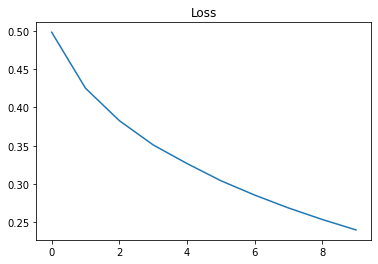

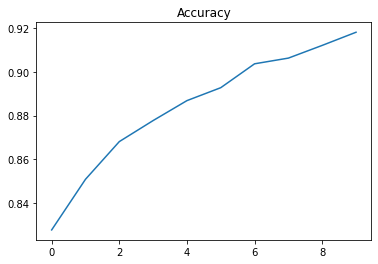

In [12]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()